In [5]:
#immport the neccesary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
# Loading the DataSets :
# train = pd.read_csv("Demo_Datasets\Lesson 4/train.csv")
# test= pd.read_csv("Demo_Datasets\Lesson 4/test.csv")
train=pd.read_csv("Demo_Datasets\Lesson 4/bigmart_train.csv")
test= pd.read_csv("Demo_Datasets\Lesson 4/bigmart_test.csv")

In [7]:
# Checking the shape of the dataset : Train
train.shape

(8523, 12)

In [8]:
#  Checking the shape of the dataset : Test
test.shape

(5681, 11)

In [10]:
# Printing the columns of the Train Datasets 
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# Printing the columns of the Test Datasets 
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [13]:
# Combine test and the train data file into one file to perform the EDA Exploratory Data Analysis 
train["source"]= "train"
test["source"]="test"
data= pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [16]:
# Numerical Data Summary of the DataSets 
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
# Checking Missing Values 
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
# Maximum number Of Missing Values can be seen in the Item_Outlet_Sales (5681)and others can be barely seen with 4016 and 2439 

In [19]:
# Printing the Unique values in the Dataset Specific in the Item_Fat_Content
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
# Printing the unique values in the Outlet_eastablishment_Year
# data["Outlet_Establishment_Year"]=data["Outlet_Age"]
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [30]:
# Calculate the Outlet age 
data["Outlet_Age"]=2018-data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [34]:
# Unique Values in the Oulet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [36]:
# nan in the above column depicts there are Misssing Values in this Colummn :::
# Printing The Count Value of Item_Fat_Content :
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [39]:
# Printing The Count Value of Outlet Size :
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [43]:
# Using the Mode Function to find the Most Commonly Occuring Values:
data["Outlet_Size"].mode()[0]

'Medium'

In [44]:
# There are 2 Columns with Missing values we're replacing it with the Mode of the respective Columns :
# Replcing the Missing value in of Outlet size with the mode :
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [45]:
# Replacing the missing values in the Item_weight with the mean Weight:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

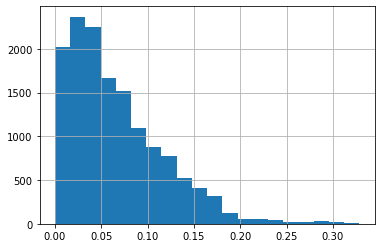

In [46]:
# Plot The Histogram to reveal the Distributions of Item_Visibility Column :
data["Item_Visibility"].hist(bins=20)

In [64]:
# Detecting the OutLiers :
# An Outlier is a data point that lies Outside the Overall Pattern in a Distribution.
# A commonly Used rule states that a data point is an outlier if it is more than 1.5*IQR (Inter Quartile range)
# above the third Quartile or Below the First Quartile 
#using this ,one can remove the outliers and output the resulting data in fill_data variable
# Calculate the first Quartile for Item_Visibility 
Q1= data["Item_Visibility"].quantile(0.25)

In [65]:
# Calculate the Second Quartile for Item_Visibility 
Q3= data["Item_Visibility"].quantile(0.75)

In [66]:
# Calculate the InterQuartileRange (IQR)
IQR = Q3-Q1

In [67]:
# Now that the IQR range is Known, remove the Outliers from the data 
# The Resulting data is Stored in Fill_data Variable :
fill_data=data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [68]:
# Display the Data 
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [71]:
# Data_set (fill_data) without Outliers : 
fill_data.shape

(13943, 14)

In [72]:
# The Actual Data set along with the Outliers :
data.shape

(14204, 14)

In [73]:
# Assign Fill_dataset to data Data_set
data= fill_data

In [74]:
data.shape

(13943, 14)

In [75]:
# Modify the Item_Visibility by converting the Numerical values to low Visibility , visibility and High Visibility ;
data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels = {'Low Viz','Viz','High Viz'})

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/250953025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels = {'Low Viz','Viz','High Viz'})


In [76]:
# Print the count of Item_Visibility_bins 
data["Item_Visibility_bins"].value_counts()

Viz         7363
High Viz    4283
Low Viz     1418
Name: Item_Visibility_bins, dtype: int64

In [77]:
#Replace null values with Low Visibility
data["Item_Visiility_bins"]=data["Item_Visibility_bins"].replace(np.nan,"Low Viz",regex=True)

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/2538576859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Visiility_bins"]=data["Item_Visibility_bins"].replace(np.nan,"Low Viz",regex=True)


In [78]:
# We Found types and differences in the representation in the categories of the Item_Fat_Content Variable.
# Replace all the representation of the low fat with low fat 
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/626311565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")


In [87]:
# replace all the representstion of reg with Regular
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["reg","regular"],"Regular")
# while replacint the bunch of the data we must give it as the set of attributes :: Passed as the list of such items :

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/4251457393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["reg","regular"],"Regular")


In [88]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [95]:
# Code all Categorical Variable as numeric  using 'LabelEncoder' from Sklearn's Preprocessing module:
# Initialize the label Encoder
le= LabelEncoder()

In [96]:
# transform the Item_Fat_Content
data["Item_Fat_Content"]= le.fit_transform(data["Item_Fat_Content"])

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/4276610876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Fat_Content"]= le.fit_transform(data["Item_Fat_Content"])


In [99]:
# transform the Item_Visibility_Bins
data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/3678935338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])


In [104]:
# Transform Outlet_size
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/1161992797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])


In [106]:
# Transform Outlet_Location_Type
data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/3403108823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])


In [110]:
# Print the Unique Values of the Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [112]:
# Create Dummies for Outlet_Types
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [113]:
# Explore the column Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [114]:
# As there are multiple value of Food ,noncosumable items,and drinks with different numbers ,combine the item types : 
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [116]:
# There are Multiple Values present the Item_Identifier , reduce this by mapping :
data["Item_Type_Combined"]= data["Item_Identifier"].apply(lambda x : x[0:2])
data["Item_Type_Combined"]= data["Item_Type_Combined"].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/3726888507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Type_Combined"]= data["Item_Identifier"].apply(lambda x : x[0:2])
C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_17972/3726888507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Type_Combined"]= data["Item_Type_Combined"].map({'FD':'Food',


In [117]:
# Only three Categories are present in an Item_Type_Combined Column:
data["Item_Type_Combined"].unique()

array(['Food', 'Drinks', 'Non-Consumable'], dtype=object)

In [118]:
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [120]:
data.shape

(13943, 17)

In [121]:
# Perform one -hot encoding for all columns as the model works on numerical values and not on categorical values :
data= pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Item_Type_Combined"])

In [122]:
data.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                       float64
Item_Type                              object
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Establishment_Year               int64
Outlet_Type                            object
Item_Outlet_Sales                     float64
source                                 object
Outlet_Age                              int64
Item_Visibility_bins                    int32
Item_Visiility_bins                  category
Item_Fat_Content_0                      uint8
Item_Fat_Content_1                      uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Item_Type_Combined_Drinks         

In [123]:
import warnings 
warnings.filterwarnings('ignore')

# Drop the columns which have been Converted to Different Types:
data.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)
# Divide the Dataset Created earlier into train and test dataSets 
train= data.loc[data["source"]=="train"]
test= data.loc[data["source"]=="test"]
# Drop Unneecessary Columns 
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)
# Export modified version of the files :
train.to_csv("train_modified.csv",index=False)
train.to_csv("test_modified.csv",index=False)

In [124]:
# Read the train_modified.csv and test_modified.csv 
train2= pd.read_csv("train_modified.csv")
test2= pd.read_csv("test_modified.csv")

In [125]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Type                           object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Visiility_bins                   object
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
dtype: object

In [126]:
test.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                       float64
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Type                            object
Outlet_Age                              int64
Item_Visibility_bins                    int32
Item_Visiility_bins                  category
Item_Fat_Content_0                      uint8
Item_Fat_Content_1                      uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Item_Type_Combined_Drinks               uint8
Item_Type_Combined_Food                 uint8
Item_Type_Combined_Non-Consumable       uint8
dtype: object

In [163]:
# Drop the Irrelevent variables from train2 dataset
# Create the indepandent Variable X_train and dependent vaariable y_train
X_train = train2.drop(["Item_Outlet_Sales","Outlet_Type","Outlet_Identifier","Item_Identifier","Item_Visiility_bins"],axis=1)
Y_train = train2.Item_Outlet_Sales

In [164]:
X_test = test2.drop(["Outlet_Type","Outlet_Identifier","Item_Identifier","Item_Visiility_bins"],axis=1)

In [156]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.300,0.016047,249.8092,3735.1380,19,2,1,0,1,0,0,0,1,0,0,1,0
1,5.920,0.019278,48.2692,443.4228,9,2,0,1,0,0,1,0,1,0,1,0,0
2,17.500,0.016760,141.6180,2097.2700,19,2,1,0,1,0,0,0,1,0,0,1,0
3,19.200,0.000000,182.0950,732.3800,20,3,0,1,0,0,1,0,1,0,0,1,0
4,8.930,0.000000,53.8614,994.7052,31,3,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,6.865,0.056783,214.5218,2778.3834,31,2,1,0,0,0,1,1,0,0,0,1,0
8371,8.380,0.046982,108.1570,549.2850,16,2,0,1,0,1,0,0,1,0,0,1,0
8372,10.600,0.035186,85.1224,1193.1136,14,2,1,0,0,1,0,0,0,1,0,0,1
8373,7.210,0.145221,103.1332,1845.5976,9,1,0,1,0,0,1,0,1,0,0,1,0


In [165]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,2,1,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,9,2,0,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,141.6180,19,2,1,0,1,0,0,0,1,0,0,1,0
3,19.20,0.000000,182.0950,20,3,0,1,0,0,1,0,1,0,0,1,0
4,8.93,0.000000,53.8614,31,3,1,0,0,0,1,1,0,0,0,0,1


In [166]:
Y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [167]:
# Import the Libraries for the model Selection:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [168]:
# Create the train and test split
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

In [169]:
# Fit the regression to the Dataset 
lin = LinearRegression()

In [170]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [172]:
print(lin.coef_)
lin.intercept_

[ 6.96720557e-01 -3.56698678e+03  1.59007483e+01  3.52916330e+01
 -6.88164978e+01 -9.68830425e+00  9.68830425e+00 -2.67501221e+02
  3.45452572e+02 -7.79513510e+01 -9.65646490e+01  2.18318792e+02
 -1.21754143e+02  1.22893629e+01  5.42202063e+01 -6.65095692e+01]


-546.6218919209323

In [173]:
# Predict the test set results of training data
predictions = lin.predict(xtest)
predictions

array([2090.36889199, 2849.29300805, 2996.89279671, ..., 3080.47734645,
       3199.05551184,  995.58453244])

In [174]:
import math

In [175]:
# Find the RMSE for the Model 
print(math.sqrt(mean_squared_error(ytest,predictions)))

1363.0722667978057


In [177]:
# A good RMSE for this is 1130 which somehow not achieved here and yeah it gives all the positive vibes although it fetched a whole lot of errors it 
# Improve the RMSE using algos like Descion trees,random forests and XGboost:
#  Next we will predict the sales of each product at a particular store in test data:

In [187]:
# Predict the Column Item_Outlet_Sales of the Dataset
y_sales_pred = lin.predict(xtest)
y_sales_pred

array([2090.36889199, 2849.29300805, 2996.89279671, ..., 3080.47734645,
       3199.05551184,  995.58453244])

In [188]:
test_predictions= pd.DataFrame({
    'Item_Identifier':test2['Item_Identifier'],
    'Outlet_Identifier':test2['Outlet_Identifier'],
    'Item_Outlet_Sales':y_sales_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

ValueError: array length 2513 does not match index length 8375

In [189]:
test_predictions

NameError: name 'test_predictions' is not defined